<a href="https://colab.research.google.com/github/0xQuirKai/0xQuirkai/blob/main/tp_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from typing_extensions import dataclass_transform
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2

**IMPORT DATASET**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/weatherHistory.csv'
df = pd.read_csv(file_path)



**CHECKING DATASET**

In [7]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
# Afficher les attribut/information sur la base de données
print(df.columns)
print(df.info)
# Calculer le nombre de valeurs de chaque attribut
df.count()
#  calculer le nombre d'éléments uniques pour chaque attribut
df.nunique()

Number of Rows: 96453
Number of Columns: 12
Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
<bound method DataFrame.info of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly C

,0
Formatted Date,96429
Summary,27
Precip Type,2
Temperature (C),7574
Apparent Temperature (C),8984
Humidity,90
Wind Speed (km/h),2484
Wind Bearing (degrees),360
Visibility (km),949
Loud Cover,1


In [14]:
# Suppression Attributes (e.g., 'Formatted Date', 'Loud Cover')
Date_column1 = 'Formatted Date'
data_Cleaning = df.drop(columns=[Date_column1], axis=1)

Date_column2 = 'Loud Cover'
data_Cleaning = data_Cleaning.drop(columns=[Date_column2], axis=1)

data_Cleaning.columns


Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [8]:
#afficher les attributs avec des valeurs manquantes
missing_attributes = df.columns[df.isna().any()]
print(missing_attributes)
# Trouver les valeurs manquantes dans la colonne "'Precip Type'"
missing_values = df[df['Precip Type'].isna()].index
# Afficher les lignes avec des valeurs manquantes
print((missing_values).value_counts)
#afficher les valeurs de Precip Type avec le nombre de typles de chaque valeur
df['Precip Type'].value_counts()

Index(['Precip Type'], dtype='object')
<bound method IndexOpsMixin.value_counts of Index([52672, 52674, 52675, 52677, 52678, 52680, 52681, 52683, 52684, 52687,
       ...
       95579, 95580, 95581, 95582, 95583, 95584, 95585, 95586, 95587, 95588],
      dtype='int64', length=517)>


,count
Precip Type,
rain,85224
snow,10712


In [15]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical(df):
    label_encoder = LabelEncoder()
    categorical_features = df.select_dtypes(include=['object']).columns
    for feature in categorical_features:
        df[feature] = label_encoder.fit_transform(df[feature])
    return df

data_Cleaning = label_encode_categorical(data_Cleaning)
print("Data after encoding:\n", data_Cleaning.head())


Data after encoding:
    Summary  Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0       19            0         9.472222                  7.388889      0.89   
1       19            0         9.355556                  7.227778      0.86   
2       17            0         9.377778                  9.377778      0.89   
3       19            0         8.288889                  5.944444      0.83   
4       17            0         8.755556                  6.977778      0.83   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0            14.1197                   251.0          15.8263   
1            14.2646                   259.0          15.8263   
2             3.9284                   204.0          14.9569   
3            14.1036                   269.0          15.8263   
4            11.0446                   259.0          15.8263   

   Pressure (millibars)  Daily Summary  
0               1015.13            197  
1               1015.63 

In [20]:
for index in data_Cleaning.index:
  if data_Cleaning.loc[index, 'Precip Type'] == 2:
    data_Cleaning.loc[index, 'Precip Type'] = data_Cleaning['Precip Type'].mode()[0]
data_Cleaning.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Supposons que la variable cible s'appelle 'Precip Type'
target_column = 'Precip Type'

# Séparation des features et de la cible
data_Cleaning_X = data_Cleaning.drop(columns=[target_column])
data_Cleaning_Y = data_Cleaning[target_column]

# Étape de sélection des attributs avec la méthode ANOVA (ANOVA F-test)
# k est le nombre de caractéristiques à sélectionner
anova_selector = SelectKBest(score_func=f_classif, k=5)

# Application du test ANOVA
X_anova = anova_selector.fit_transform(data_Cleaning_X, data_Cleaning_Y)

# Récupération des features sélectionnées
selected_features = anova_selector.get_support()  # Vecteur booléen (True = sélectionné)
print("Selected features using ANOVA:")
print(selected_features)

# Noms des colonnes sélectionnées
selected_feature_names = data_Cleaning_X.columns[selected_features]
print("Selected feature names using ANOVA:")
print(selected_feature_names)


Selected features using ANOVA:
[False  True  True  True False False  True False  True]
Selected feature names using ANOVA:
Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Visibility (km)', 'Daily Summary'],
      dtype='object')


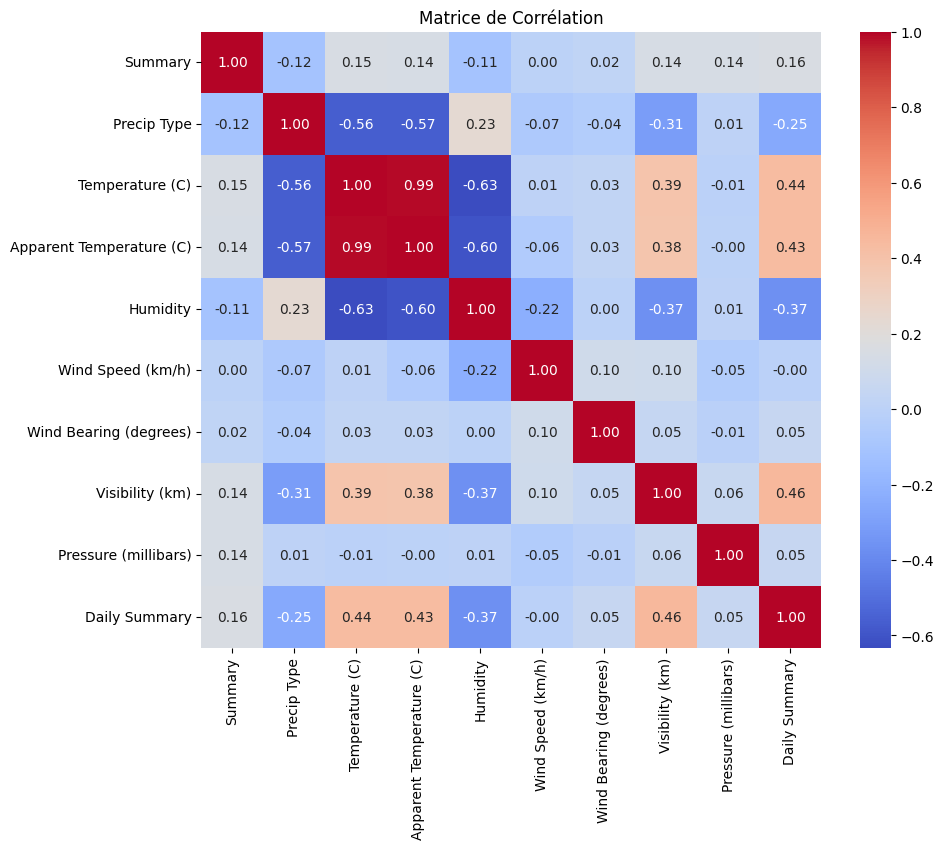

In [22]:
# Selection des attributs a base de la matrice de corrélation
correlation_matrix = data_Cleaning.corr()
# Créez un graphique de matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# 1. Séparer la variable cible déjà encodée
target_variable = 'Precip Type'
features = data_Cleaning.drop(columns=[target_variable])
target = data_Cleaning[target_variable] # Déjà encodé
# 2. Normaliser les autres variables
scaler = MinMaxScaler()

features_normalized = scaler.fit_transform(features)
# 3. Recréer le DataFrame normalisé
data_normalized = pd.DataFrame(features_normalized, columns=features.columns)
# 4. Réintégrer la colonne 'Precip Type' encodée
data_normalized[target_variable] = target.values
# 5. Affichage
print("Données normalisées avec 'Precip Type' encodé ajouté :")
print(data_normalized.head())

Données normalisées avec 'Precip Type' encodé ajouté :
    Summary  Temperature (C)  Apparent Temperature (C)  Humidity  \
0  0.730769         0.506975                  0.523486      0.89   
1  0.730769         0.505085                  0.521084      0.86   
2  0.653846         0.505445                  0.553144      0.89   
3  0.730769         0.487805                  0.501947      0.83   
4  0.653846         0.495365                  0.517356      0.83   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0           0.221130                0.699164            0.983   
1           0.223399                0.721448            0.983   
2           0.061523                0.568245            0.929   
3           0.220877                0.749304            0.983   
4           0.172970                0.721448            0.983   

   Pressure (millibars)  Daily Summary  Precip Type  
0              0.970135       0.924883            0  
1              0.970613       0.92488